In [4]:
# import libraries 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib_inline 
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')



In [8]:
data = pd.read_csv('mnist_train.csv')
data = data.values


In [15]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
labels = data[:, 0]
data = data[:,1:]

print(labels.shape)
print(data.shape)

(20000,)
(20000, 784)


In [12]:
labels

array([1, 0, 1, ..., 6, 8, 7], dtype=int64)

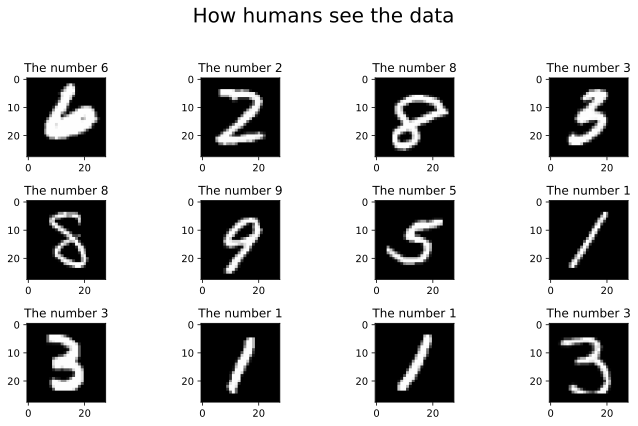

In [13]:
fig, axs = plt.subplots(3,4, figsize = (10,6))

for ax in axs.flatten():

    # pick a random image
    randimg2show = np.random.randint(0, high = data.shape[0])

    # create the image 
    img = np.reshape(data[randimg2show, :], (28,28) )
    ax.imshow(img, cmap = 'gray')

    # title 
    ax.set_title('The number %i' %labels[randimg2show])

plt.suptitle('How humans see the data', fontsize = 20)
plt.tight_layout(rect = [0,0,1,.95])
plt.show()

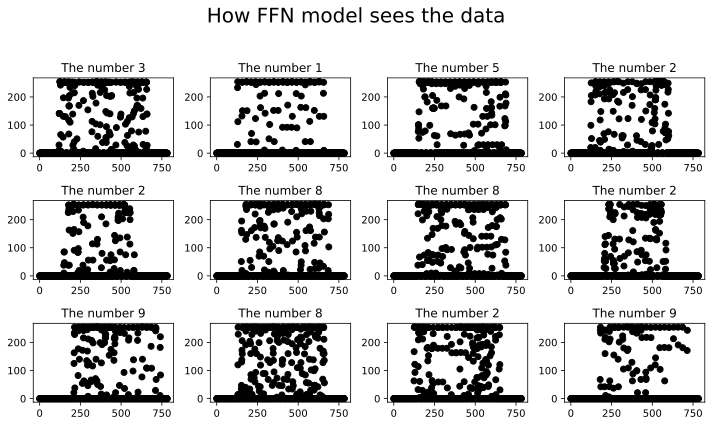

In [14]:
# show a few random digits 
fig, axs = plt.subplots(3, 4, figsize = (10, 6))

for ax in axs.flatten():
    randimg2show = np.random.randint(0, high = data.shape[0])

    # create the image  
    ax.plot(data[randimg2show,:], 'ko')

    # title 
    ax.set_title('The number %i' %labels[randimg2show])

plt.suptitle('How FFN model sees the data', fontsize = 20)
plt.tight_layout(rect = [0,0,1,.95])
plt.show()

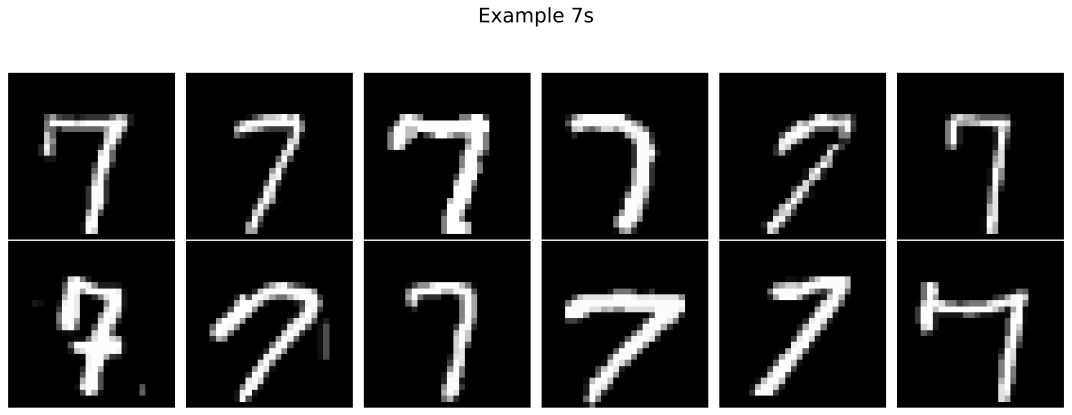

In [16]:
# examples of 7s

the7s = np.where(labels == 7)[0]

# draw the first 12 
fig, axs = plt.subplots(2, 6, figsize = (15, 6))

for i, ax in enumerate(axs.flatten()):
    img = np.reshape(data[the7s[i], :], (28, 28))
    ax.imshow(img, cmap = 'gray')
    ax.axis('off')

plt.suptitle('Example 7s', fontsize = 20)
plt.tight_layout(rect = [0, 0, 1, .95])
plt.show()

(2070, 784)


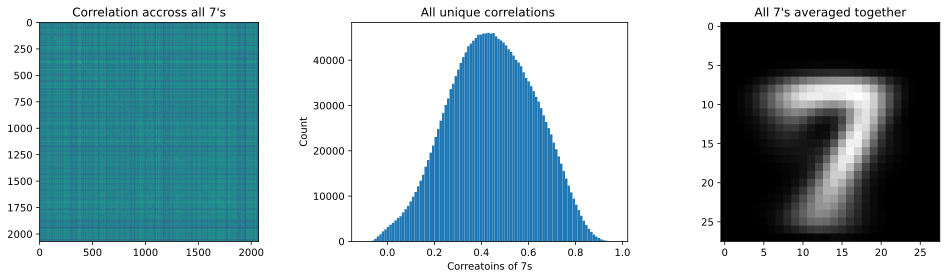

In [24]:
# checking the smilarity in the 7s

print(data[the7s, :].shape)

C = np.corrcoef(data[the7s, :])

# and visualize 
fig, ax = plt.subplots(1, 3, figsize = (14, 4))
ax[0].imshow(C, vmin = 0, vmax = 1)
ax[0].set_title("Correlation accross all 7's")

# extract the unique correlations and show as a scatter plot 
uniqueCs = np.triu(C, k = 1).flatten()
ax[1].hist(uniqueCs[uniqueCs != 0], bins = 100)
ax[1].set_title('All unique correlations ')
ax[1].set_xlabel('Correatoins of 7s')
ax[1].set_ylabel('Count')


# showing all the 7s together 
aveAll7s = np.reshape(np.mean(data[the7s, :], axis = 0), (28,28))
ax[2].imshow(aveAll7s, cmap = 'gray')
ax[2].set_title("All 7's averaged together")

plt.tight_layout()
plt.show()